<a href="https://colab.research.google.com/github/Adarsh-N123/A-Z-Handwritten-Digits-Classifier-from-scratch-Naive-Bayes-cs230-project/blob/main/cs230projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nidamanurisaiadarsh"
os.environ['KAGGLE_KEY'] = "be6ca3bc2dd7bf970efd0e0c39996073"

In [ ]:
!kaggle datasets download sachinpatel21/az-handwritten-alphabets-in-csv-format

az-handwritten-alphabets-in-csv-format.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df = pd.read_csv("A_Z Handwritten Data.csv")
y = df["0"]
x = df.drop("0",axis=1)

In [ ]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = x//64

In [ ]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
y1 = y.replace([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25],['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [ ]:
y1.value_counts().sum()

372450

In [ ]:
from sklearn.model_selection import train_test_split
X_test, x, y_test, y = train_test_split(x, y, test_size=0.9, stratify=y)

In [ ]:
L=[]
for i in range(26):
  count = len(y[y==i])
  prob = count
  L.append(prob)

In [ ]:
L#number at index i probability that a given test alphabet is i

[12482,
 7801,
 21068,
 9121,
 10296,
 1047,
 5186,
 6496,
 1008,
 7644,
 5043,
 10427,
 11102,
 17109,
 52043,
 17407,
 5231,
 10409,
 43577,
 20245,
 26107,
 3764,
 9706,
 5645,
 9773,
 5468]

In [ ]:
my_list = x.columns.values.tolist()

In [ ]:
x["result"]=y

In [ ]:
def prod(L1,i):
    mul = 1
    a1 = x[x["result"]==i]
    val = my_list
    for j in range(784):
      # a = a1[a1[val[j]]==L1[j]]
      a = np.array(a1[val[j]]==L1[j])
      # count1 = len(a)+1
      count1 = np.count_nonzero(a)+1#np.count_nonzero here used for counting the True values as the True has value 1 and False has zero and +1 for smoothing
      count1 = count1
      count2 = L[i]
      count3 = count1/count2
      mul = mul*count3
    return mul

def predict(L1):
  
  L34=[]
  def deno(L1):
    print("Applying Multinomial Bayes started...")
    sum1 = 0
    for i in range(26):
      count1 = L[i]
      count2 = prod(L1,i)
      # print(count2)
      L34.append(count2)
      count3 = count1*count2

      sum1 = sum1+count3
    print("denominator calculated...")
    return sum1
  # print(sum)
  L2 = []
  deno1 = deno(L1)
  print(deno1)

  def res(L1):
    for i in range(26):
      count11 = L[i]
      # count22 = prod(L1,i)
      count22 = L34[i]
      count33 = count11*count22
      count55 = deno1
      count44 = count33/count55
      L2.append(count44)
    print("Letter Identification completed successfully :)")

  res(L1)

  # res_fin = np.argmax(L2)
  return L2







In [ ]:
X_test["result"]=y_test


In [ ]:
test = []
L5=[]
# testing = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
#   t = X_train[X_train["result"]==i].iloc[1]
#   test.append(t[:784])
  t = X_test[X_test["result"]==i].iloc[1]
  t1 = X_test[X_test["result"]==i].iloc[2]
  t2 = X_test[X_test["result"]==i].iloc[3]
  t3 = X_test[X_test["result"]==i].iloc[4]
  test.append(t[:784])
  test.append(t1[:784])
  test.append(t2[:784])
  test.append(t3[:784])
for i in test:
  L5.append(predict(i))
  # mul = prod(i,1)
  # print(mul)

Applying Multinomial Bayes started...
denominator calculated...
1.840430917598321e-121
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
1.0365950285561408e-154
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
4.541690317799991e-149
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
6.852691213840515e-136
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
6.293701805530718e-154
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
8.83765363279296e-143
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calculated...
5.110715571874876e-141
Letter Identification completed successfully :)
Applying Multinomial Bayes started...
denominator calcu

In [ ]:
L5
testing1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
testing = []
for i in testing1:
  for j in range(4):
    testing.append(i)
L9 = []
for i in range(len(L5)):
  L6 = np.array(L5[i])
  prediction = np.argmax(L6)
  L9.append(prediction)
  LA=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
  'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
  print("the predicted letter is:",LA[prediction]+"&"+"Actual letter is :",LA[testing[i]])



the predicted letter is: A&Actual letter is : A
the predicted letter is: A&Actual letter is : A
the predicted letter is: A&Actual letter is : A
the predicted letter is: A&Actual letter is : A
the predicted letter is: B&Actual letter is : B
the predicted letter is: B&Actual letter is : B
the predicted letter is: B&Actual letter is : B
the predicted letter is: B&Actual letter is : B
the predicted letter is: C&Actual letter is : C
the predicted letter is: C&Actual letter is : C
the predicted letter is: L&Actual letter is : C
the predicted letter is: C&Actual letter is : C
the predicted letter is: D&Actual letter is : D
the predicted letter is: D&Actual letter is : D
the predicted letter is: D&Actual letter is : D
the predicted letter is: D&Actual letter is : D
the predicted letter is: G&Actual letter is : E
the predicted letter is: E&Actual letter is : E
the predicted letter is: E&Actual letter is : E
the predicted letter is: E&Actual letter is : E
the predicted letter is: F&Actual letter

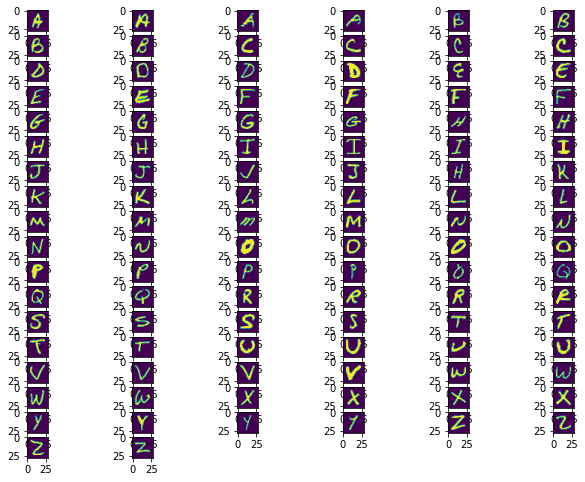

In [ ]:
plt.figure(figsize=(11,11))
for i in range(104):
  plt.subplot(24,6,i+1)
  test1 = np.array(test[i]).reshape(28,28)
  plt.imshow(test1)


In [ ]:
count123=0
L11=[]
for i in range(len(L9)):
  L11.append(i//4)
  if i//4==L9[i]:
    count123+=1
print("accuracy is:",count123/len(L9))

accuracy is: 0.8365384615384616


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:

cfmatrix = confusion_matrix(L11,L9)
f1_score(L11,L9,average='weighted')

0.828887778887779

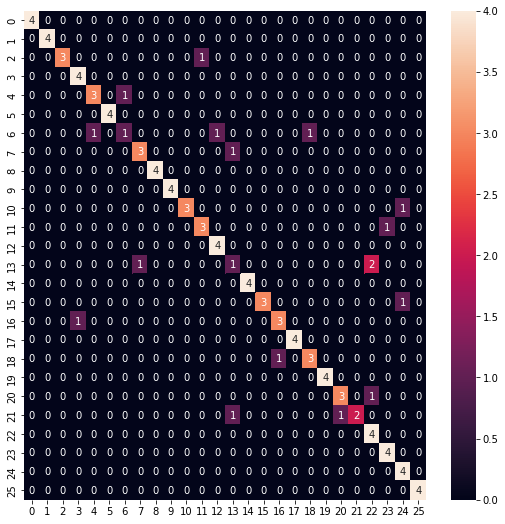

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cfmatrix,annot=True)